correlation coeffecient: [0.41151914]


Text(0, 0.5, 'Data 2')

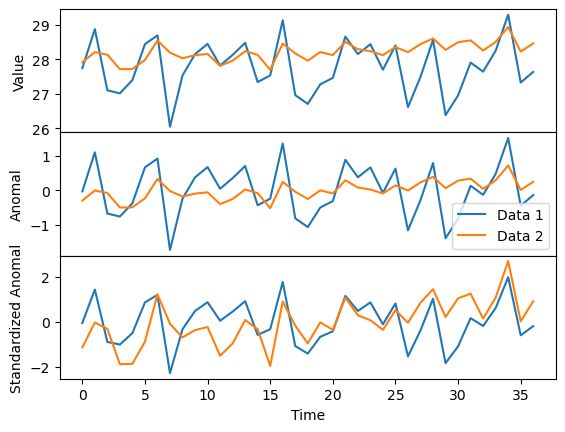

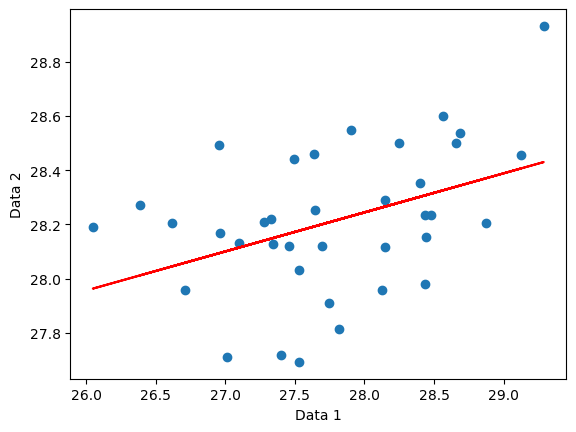

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap as bm
from scipy import stats
# load data
# x = np.genfromtxt("/home/x/ictp/num2/datasets/sampledata.txt")

x = np.genfromtxt('../datasets/sampledata.txt')

y = np.genfromtxt('../datasets/sampledata2.txt')

# plot
fig, ax = plt.subplots(3,1)
ax[0].plot(x)
ax[0].plot(y)
xAnomal = x - np.mean(x)
yAnomal = y - np.mean(y)
ax[1].plot(xAnomal, label = "Data 1")
ax[1].plot(yAnomal, label = "Data 2")
ax[1].legend()
xAnomalStd = xAnomal/np.std(x)
yAnomalStd = yAnomal/np.std(y)
ax[2].plot(xAnomalStd )
ax[2].plot(yAnomalStd)
ax[2].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[1].set_ylabel("Anomal")
ax[2].set_ylabel("Standardized Anomal")
fig.subplots_adjust(hspace=.0)

# covariance and correlation
covxy = np.dot(xAnomal,(np.atleast_2d(yAnomal).T))/(len(x))
r = covxy/(np.std(x)*np.std(y))
print("correlation coeffecient:", r)
plt.figure()
plt.scatter(x,y)
slope, intercept, r, p, std_err = stats.linregress(x, y)
func = lambda x: slope*x + intercept
mymodel = list(map(func, x))
plt.plot(x, mymodel, 'r')
plt.xlabel("Data 1")
plt.ylabel("Data 2")